##  Unit 1 – Data Mining Introduction

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("D:\DMA\online_retail.csv")

# Basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()

# Drop rows with missing Description or CustomerID
df.dropna(subset=['Description', 'CustomerID'], inplace=True)

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove canceled transactions (InvoiceNo starts with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Display sample
df.head()

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\abhik\AppData\Local\Temp\ipykernel_11072\439740678.py:7: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\DMA\online_retail.csv")


Shape: (541909, 8)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


C:\Users\abhik\AppData\Local\Temp\ipykernel_11072\3076969983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


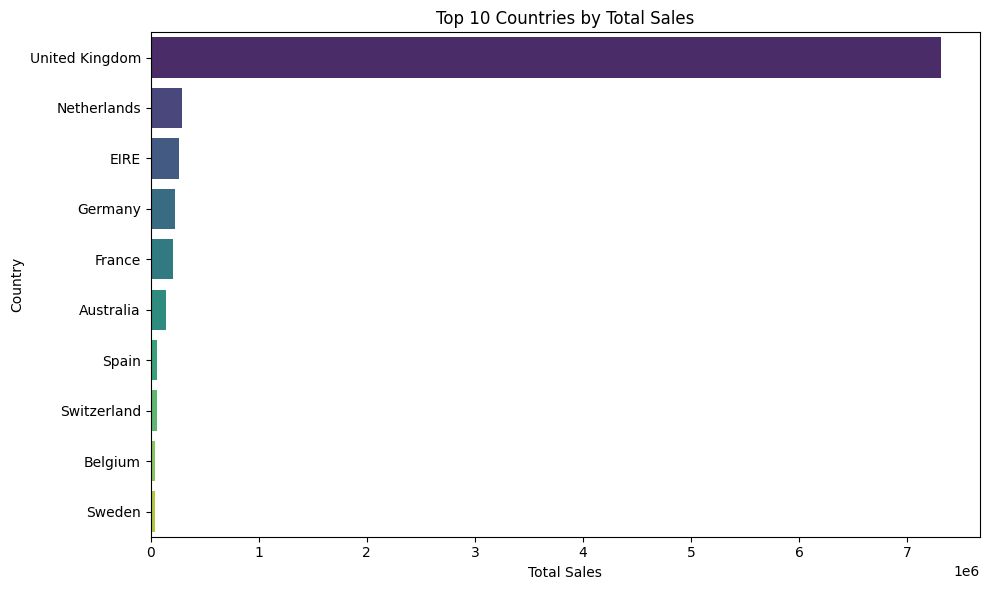

In [7]:
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

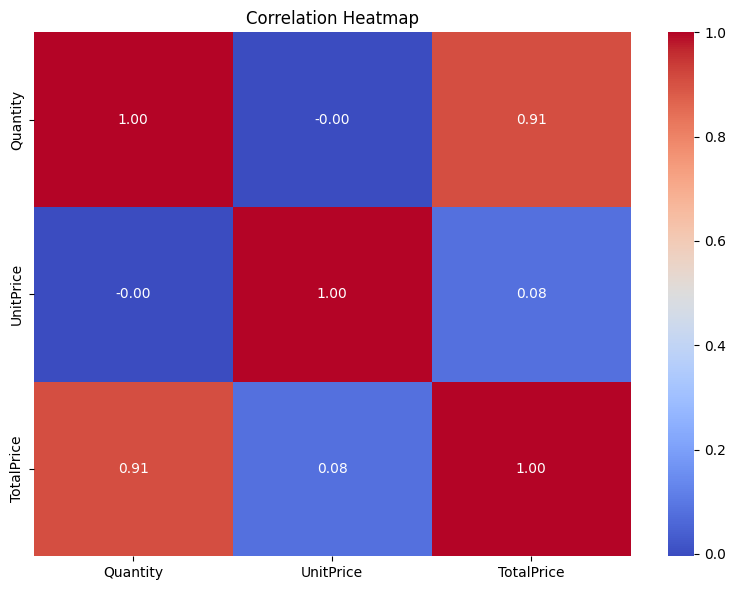

In [8]:
plt.figure(figsize=(8, 6))
numeric_df = df[['Quantity', 'UnitPrice', 'TotalPrice']]
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

C:\Users\abhik\AppData\Local\Temp\ipykernel_11072\3559561400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


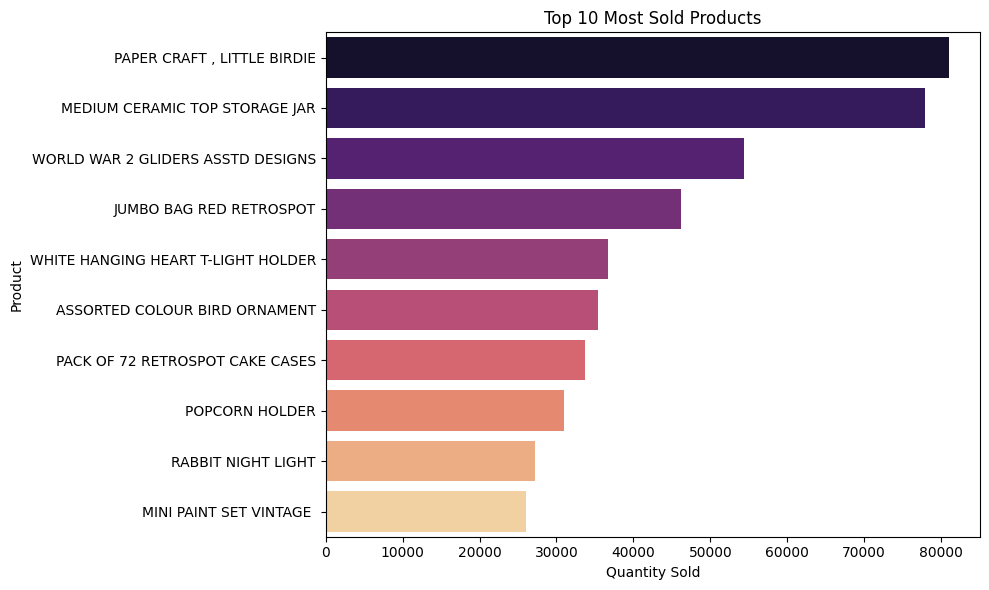

In [9]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title("Top 10 Most Sold Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

## Unit 2 – Associations and Correlations

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules

# Group transactions by InvoiceNo and Description
basket = df[df['Country'] == 'United Kingdom'].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Convert values to 1/0
basket_sets = basket.applymap(lambda x: 1 if x >= 1 else 0)

# Generate frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display top rules
rules.sort_values(by='lift', ascending=False).head()

C:\Users\abhik\AppData\Local\Temp\ipykernel_11072\4035530145.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(lambda x: 1 if x >= 1 else 0)
c:\Users\abhik\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
149,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.010751,0.010872,0.010151,0.944134,86.844687,1.0,0.010034,17.705400,0.999228,0.884817,0.943520,0.938918
148,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.010872,0.010751,0.010151,0.933702,86.844687,1.0,0.010034,14.921166,0.999350,0.884817,0.932981,0.938918
532,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE ROSES ),0.013634,0.015977,0.011532,0.845815,52.939750,1.0,0.011314,6.382092,0.994672,0.637874,0.843312,0.783810
533,(REGENCY TEA PLATE ROSES ),(REGENCY TEA PLATE GREEN ),0.015977,0.013634,0.011532,0.721805,52.939750,1.0,0.011314,3.545584,0.997040,0.637874,0.717959,0.783810
511,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE BEDROOM ),0.012553,0.015617,0.010151,0.808612,51.779187,1.0,0.009955,5.143404,0.993155,0.563333,0.805576,0.729306


C:\Users\abhik\AppData\Local\Temp\ipykernel_11072\410720952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items['support'], y=top_items['itemsets'].astype(str), palette='plasma')


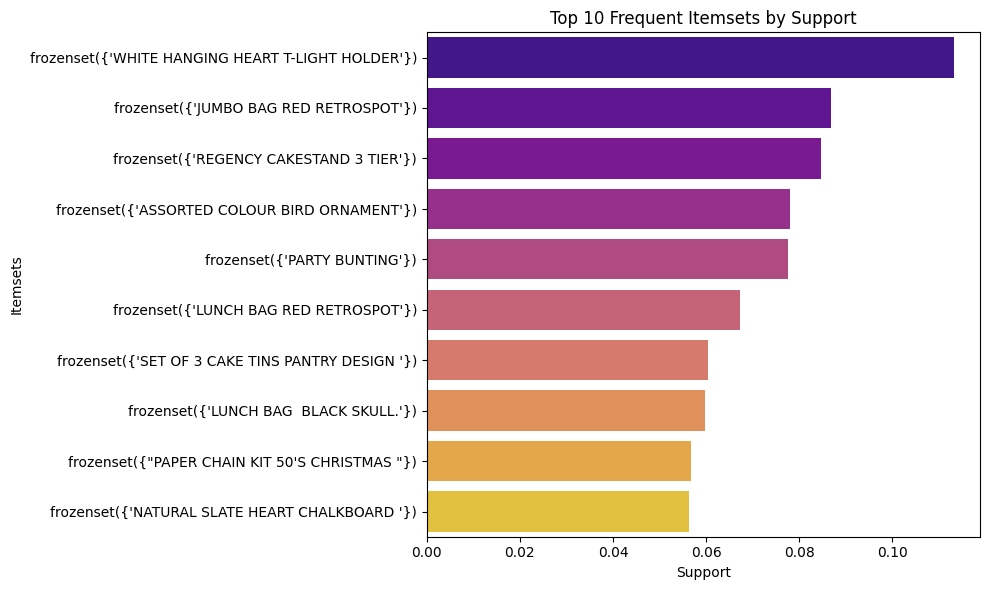

In [10]:
top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items['support'], y=top_items['itemsets'].astype(str), palette='plasma')
plt.title("Top 10 Frequent Itemsets by Support")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.tight_layout()
plt.show()

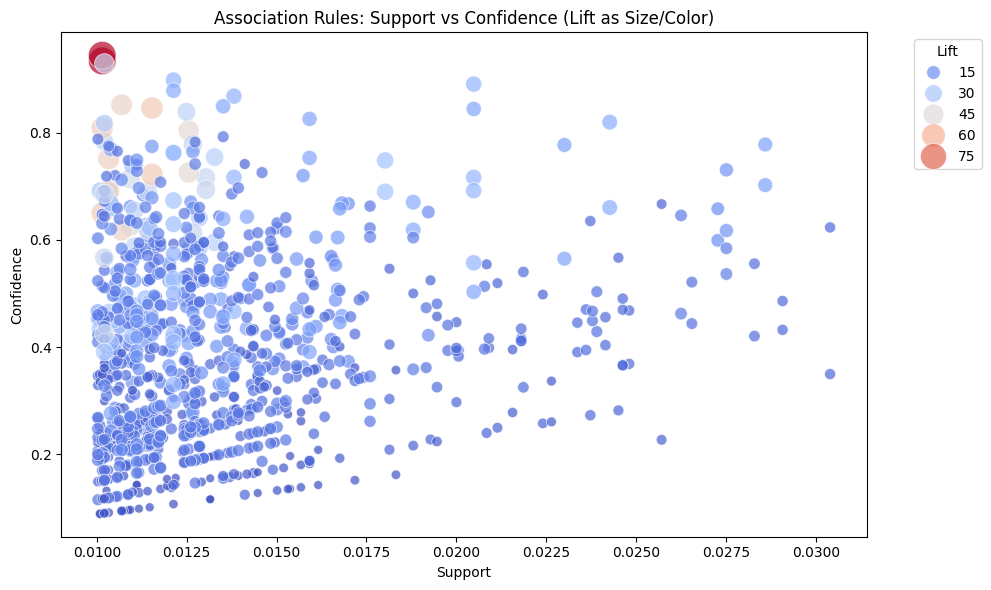

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='coolwarm', sizes=(40, 400), alpha=0.7)
plt.title("Association Rules: Support vs Confidence (Lift as Size/Color)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(title="Lift", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Unit 3 – Classification and Prediction

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Customer-wise aggregation
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceNo': 'NumPurchases', 'TotalPrice': 'TotalSpend'})

# Create target: High spender if total > threshold
threshold = customer_df['TotalSpend'].median()
customer_df['HighSpender'] = (customer_df['TotalSpend'] > threshold).astype(int)

# Features and labels
X = customer_df[['NumPurchases']]
y = customer_df['HighSpender']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8534562211981567
Confusion Matrix:
 [[470  65]
 [ 94 456]]


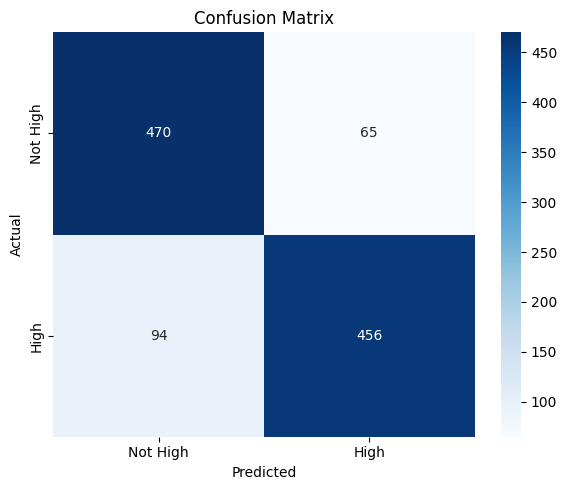

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not High', 'High'], yticklabels=['Not High', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## Unit 4 – Cluster Analysis


Silhouette Scores:
KMeans: 0.941
Agglomerative: 0.904
DBSCAN: Not applicable (less than 2 clusters or all noise)
BIRCH: 0.960


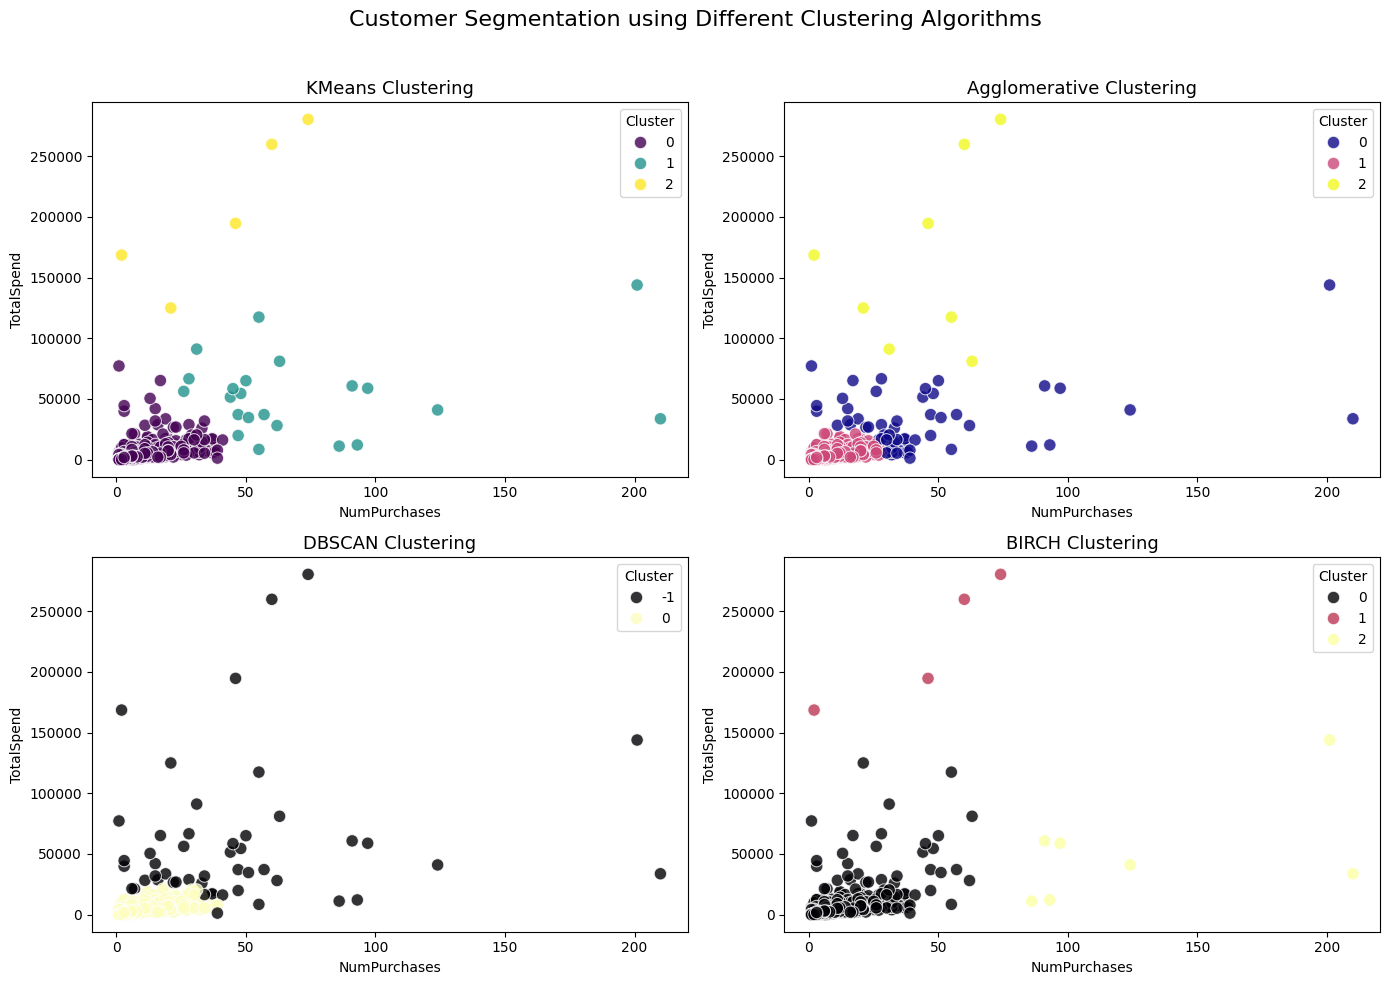

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, Birch, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Select features for clustering
X = customer_df[['NumPurchases', 'TotalSpend']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Store results
cluster_labels = {}
silhouette_scores = {}

# 1. KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels['KMeans'] = kmeans.fit_predict(X_scaled)
silhouette_scores['KMeans'] = silhouette_score(X_scaled, cluster_labels['KMeans'])

# 2. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
cluster_labels['Agglomerative'] = agglo.fit_predict(X_scaled)
silhouette_scores['Agglomerative'] = silhouette_score(X_scaled, cluster_labels['Agglomerative'])

# 3. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)
cluster_labels['DBSCAN'] = db_labels

# Check valid cluster count for silhouette score
unique_labels = set(db_labels)
non_noise_labels = unique_labels - {-1}
if len(non_noise_labels) >= 2:
    silhouette_scores['DBSCAN'] = silhouette_score(X_scaled[db_labels != -1], db_labels[db_labels != -1])
else:
    silhouette_scores['DBSCAN'] = np.nan

# 4. BIRCH
birch = Birch(n_clusters=3)
cluster_labels['BIRCH'] = birch.fit_predict(X_scaled)
silhouette_scores['BIRCH'] = silhouette_score(X_scaled, cluster_labels['BIRCH'])

# Print Silhouette Scores
print("\nSilhouette Scores:")
for method, score in silhouette_scores.items():
    if not np.isnan(score):
        print(f"{method}: {score:.3f}")
    else:
        print(f"{method}: Not applicable (less than 2 clusters or all noise)")

# Plot all clustering results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
methods = ['KMeans', 'Agglomerative', 'DBSCAN', 'BIRCH']
palettes = ['viridis', 'plasma', 'magma', 'inferno']

for i, method in enumerate(methods):
    customer_df[method + '_Cluster'] = cluster_labels[method]
    sns.scatterplot(
        data=customer_df,
        x='NumPurchases',
        y='TotalSpend',
        hue=method + '_Cluster',
        palette=palettes[i],
        ax=axes[i],
        s=80,
        alpha=0.8
    )
    axes[i].set_title(f"{method} Clustering", fontsize=13)
    axes[i].legend(title='Cluster', loc='best')

plt.suptitle("Customer Segmentation using Different Clustering Algorithms", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Unit 5 – Outliers and Statistical Approaches


Outliers detected: 31
      NumPurchases  TotalSpend     SpendZ
0                1    77183.60   8.359634
55              21   124914.53  13.670617
326            210    33719.73   3.523444
453             15    42055.96   4.451009
562             97    58825.83   6.316979
997             50    65039.62   7.008383
1070            57    37153.85   3.905555
1285            13    50491.81   5.389660
1290            17    65164.79   7.022310
1334            55   117379.63  12.832214
1435            44    51527.30   5.504878
1690            74   280206.02  30.949777
1880           201   143825.06  15.774776
1984            48    54534.14   5.839446
2012             3    39916.50   4.212953
2177            91    60767.90   6.533072
2503             3    44534.30   4.726772
2518            26    56252.72   6.030672
2571            19    33643.08   3.514915
2689            47    37130.60   3.902968
2703            63    81024.84   8.787046
2991            51    34684.40   3.630782
3009       

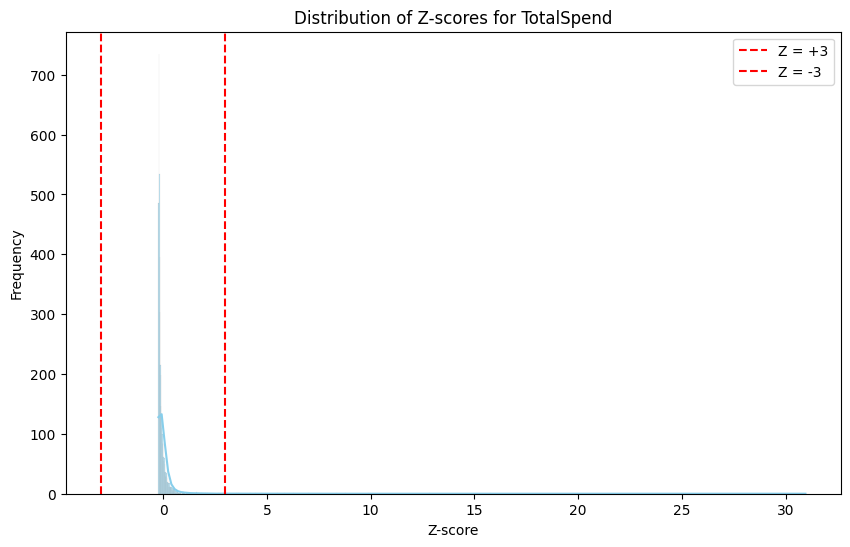

C:\Users\abhik\AppData\Local\Temp\ipykernel_11072\2613597865.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_spend, y='TotalSpend', palette='pastel')


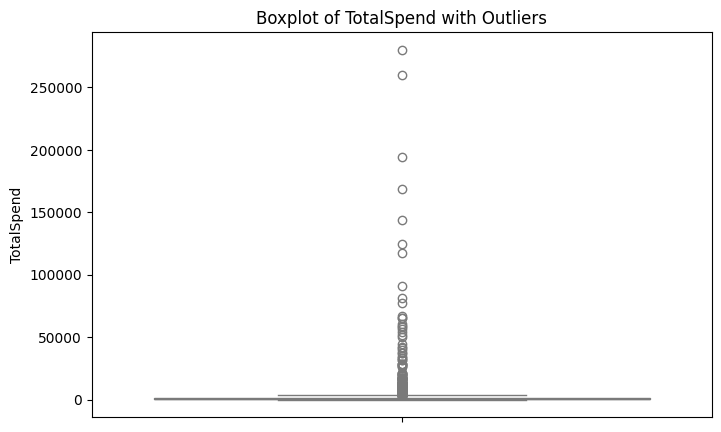

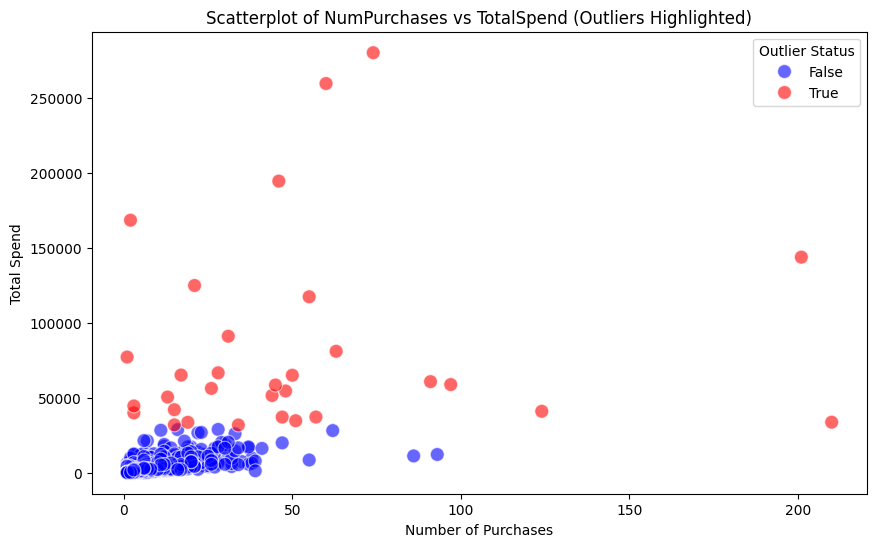


Statistical Approach Summary:
- Z-score is a standardized score representing how many standard deviations a value is from the mean.
- A common threshold is |Z| > 3 for defining outliers in a normal distribution.
- Detected 31 outliers from 4339 total records.


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

customer_df = pd.read_csv(r'D:\DMA\online_retail.csv', encoding='ISO-8859-1')

customer_df = customer_df[customer_df['Quantity'] > 0]
customer_df['TotalSpend'] = customer_df['UnitPrice'] * customer_df['Quantity']

customer_spend = customer_df.groupby('CustomerID').agg(
    TotalSpend=('TotalSpend', 'sum'),
    NumPurchases=('InvoiceNo', 'nunique')
).reset_index()

customer_spend['SpendZ'] = zscore(customer_spend['TotalSpend'])
threshold = 3
customer_spend['IsOutlier'] = np.abs(customer_spend['SpendZ']) > threshold
outliers = customer_spend[customer_spend['IsOutlier'] == True]
inliers = customer_spend[customer_spend['IsOutlier'] == False]

print(f"\nOutliers detected: {outliers.shape[0]}")
print(outliers[['NumPurchases', 'TotalSpend', 'SpendZ']])

plt.figure(figsize=(10, 6))
sns.histplot(customer_spend['SpendZ'], kde=True, color='skyblue')
plt.axvline(x=threshold, color='red', linestyle='--', label='Z = +3')
plt.axvline(x=-threshold, color='red', linestyle='--', label='Z = -3')
plt.title('Distribution of Z-scores for TotalSpend')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=customer_spend, y='TotalSpend', palette='pastel')
plt.title("Boxplot of TotalSpend with Outliers")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_spend, x='NumPurchases', y='TotalSpend', hue='IsOutlier', palette={True: 'red', False: 'blue'}, s=100, alpha=0.6)
plt.title("Scatterplot of NumPurchases vs TotalSpend (Outliers Highlighted)")
plt.xlabel("Number of Purchases")
plt.ylabel("Total Spend")
plt.legend(title='Outlier Status')
plt.show()

print("\nStatistical Approach Summary:")
print(f"- Z-score is a standardized score representing how many standard deviations a value is from the mean.")
print(f"- A common threshold is |Z| > 3 for defining outliers in a normal distribution.")
print(f"- Detected {outliers.shape[0]} outliers from {customer_spend.shape[0]} total records.")
